Vous pouvez rendre ce TP *si vous le souhaitez*, en déposant votre fichier `.ipynb` dans votre dossier `Depot_fichiers` sur [cloud.maths.mlong.fr](https://cloud.maths.mlong.fr).

In [ ]:
(* Cellule à exécuter en début de TP pour les tests *)
let fonction_test nom b =
   let () = print_endline (Printf.sprintf "Test %s : %s" nom (if b then "\027[1m\027[32mOK\027[0m" else "\027[1m\027[31méchec\027[0m"))
   in assert b
   ;;

# Autour de la structure de pile

## Expression bien parenthésées

Une expression arithmétique est bien parenthésée lorsque
- le nombre de parenthèses ouvrantes est égal au nombre de parenthèses fermantes,
- à toute parenthèse fermante correspond une parenthèse ouvrante qui la précède.

Par exemple, $(1+(2+x)*5)/6$ est bien parenthésée, mais $5*((2*x+1)*3 + 1$ ne l'est pas (car comporte plus de parenthèses ouvrantes que de parenthèses fermantes), et $(x+2))*(x-1$ non plus (car la seconde parenthèse fermante ne correspond à aucune parenthèse ouvrante la précédant).

Il est possible de vérifier qu'une expression est bien parenthésée en utilisant une pile. En parcourant l'expression de gauche à droite: 
- à chaque parenthèse ouvrante, on empile le caractère correspondant,
- à chaque parenthèse fermante on dépile et on vérifie le type de parenthèse (s'il y en a plusieurs).

L'expression est bien parenthésée si, avec une pile initialemant vide, la pile n'est jamais vide lorsqu'on tente de dépiler, et si la pile est bien vide en fin de parcours.

On travaillera avec deux types de parenthèses : `()` et `[]`.

On pourra utiliser les fonctions suivantes sur les chaînes de caractères :
- `String.length : string -> int` ; `String.length s` est la longueur (nombre de caractères) de la chaîne `s`.
- `String.get : string -> int -> char` ; `String.get s i` est le caractère d'indice `i` dans `s`. On peut aussi écrire `s.[i]`. Le premier caractère de la chaîne a pour indice $0$.

On pourra utiliser une implémentation vue en cours ou le module `Stack` et les fonctions `Stack.create`, `Stack.is_empty`, `Stack.pop` et `Stack.push` pour créer et manipuler la pile.

<font size="5">👩🏼‍💻</font> Écrire une fonction `bien_parenthesee : string -> bool` qui renvoie `true` si la chaîne de caractères en paramètre est bien parenthésée, `false` sinon.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

In [ ]:
(* Exécutez cette cellule pour tester votre réponse *)
let () = fonction_test "(bien_parenthesee) Juste des parenthèses" (bien_parenthesee "(1+(2+x)∗(5+x))/6");;
let () = fonction_test "(bien_parenthesee) Parenthèses et crochets" (bien_parenthesee "([()()]())");;
let () = fonction_test "(bien_parenthesee) Pas le bon type" (not (bien_parenthesee "([()[)])()"));;
let () = fonction_test "(bien_parenthesee) Ouverte non fermée" (not (bien_parenthesee "([()[]]()"));;
let () = fonction_test "(bien_parenthesee) Fermée non ouverte" (not (bien_parenthesee "()([()()])]"));;


# Autour de la structure de files

## Implémentation d'une file avec deux piles

On considère le type `file` suivant :

In [ ]:
type 'a file = {
    entree : 'a Stack.t;
    sortie : 'a Stack.t
  };;

L'ajout d'un élément se fera dans la pile `entree`, la suppression d'un élément dans la pile `sortie`.

<font size="5">👨‍💻</font> Écrire une fonction `creer_file : unit -> 'a file` qui renvoie une file vide.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👩🏽‍💻</font> Écrire une fonction `est_vide : 'a file -> bool` qui renvoie `true` si la file est vide, `false` sinon.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👨🏾‍💻</font> Écrire une fonction `enfiler : 'a -> 'a file -> unit` qui ajoute un élément dans la file.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👩🏻‍💻</font> Écrire une fonction `defiler : 'a file -> 'a` qui supprime et renvoie l'élément en début de file.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👨🏽‍💻</font> Tester les fonctions précédentes :
- créer une file vide ;

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

- lui ajouter les entiers de 1 à 5 ;

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

- supprimer et afficher 3 éléments de la file ;

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

- lui ajouter les entiers 6 et 7 ;

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

- vider la file en affichant ses éléments.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

## Feu de forêt

On considère un damier représentant une forêt partiellement en feu. Au départ, une seule case est en feu, puis le feu se propage. La probabilité $p$ que le feu se propage d'une case en feu aux cases voisines est constante.
On considère que le damier est un carré de côté $400$ et que l'incendie naît au centre du carré.

L'algorithme de propagation utilise une structure de file.

    Allumer  le centre du damier.
    Insérer le centre dans la file des cases en attente (précédemment vide).
    Tant que la file n'est pas vide,
        extraire une case de la file.
        Pour chacune des cases voisines,
            Si la case n'est pas en feu,
                tirer au sort la propagation avec la probabilité p,
                Si le feu se propage,
                    allumer la case
                    l'ajouter à la file.

On poura utiliser la fonction suivante :

In [ ]:
Random.self_init ();;
(* Renvoie true avec une probabilité p, false avec une probabilité 1-p *)
let random_bool p =
  Random.float 1. < p
;;

<font size="5">👩🏼‍💻</font>  Écrire une fonction `propagation : float -> bool`  qui prend en argument un nombre `p` compris entre 0 et 1, qui simule l'incendie et qui renvoie booléen valant `true` si un bord a été atteint, `false` sinon.

On pourra commencer par créer une matrice de booléens dont le coefficient $(i,j)$ vaut `true` si le point de coordonnées $(i,j)$ a été atteint par l'incendie, `false` sinon.

Pour la file, on pourra utiliser l'implémentation précédente, une implémentation vue en cours ou le module `Queue` et notamment les fonctions `Queue.create`, `Queue.add`, `Queue.take`, `Queue.is_empty`.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👩🏽‍💻</font> Déterminer expérimentalement la plus petite valeur de $p$ pour laquelle les chances de propagation du feu jusqu'aux bords semblent non négligeables.

In [ ]:
(* Code pour répondre à la question *)

(*À remplacer par votre code*)
failwith "Code manquant"

✍️ *Votre réponse*

## Implémentation d'une file à l'aide d'une liste chaînée circulaire

*Remarque : cette implémentation dépasse très probablement le cadre de notre programme.*

Une liste chaînée circulaire est une liste chaînée dont le dernier élément pointe vers le premier.

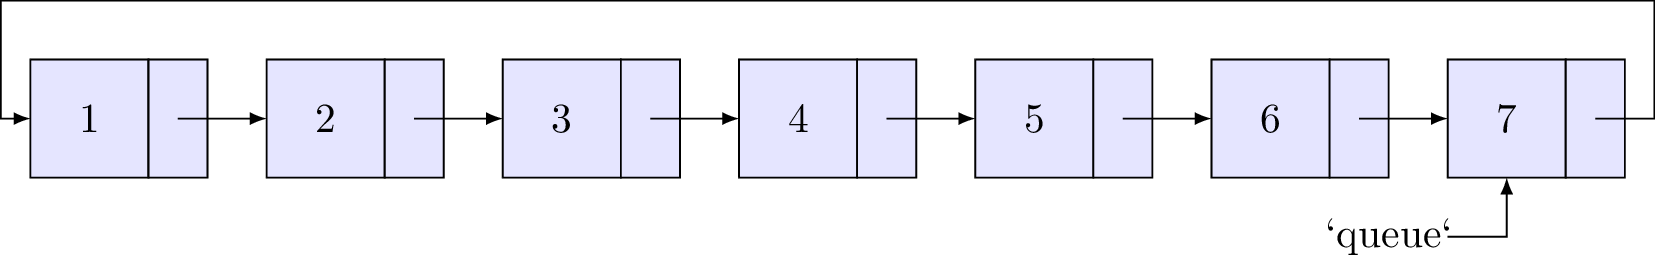

Afin de représenter une telle liste, on définit les types suivants :

In [ ]:
type 'a cellule = {valeur: 'a ; mutable suivant: 'a cellule option};;
type 'a liste = Nil | Cellule of 'a cellule;;

Nous allons utiliser une liste chaînée circulaire pour représenter une file, ce qui amène à définir le type suivant :

In [ ]:
type 'a file = {mutable queue : 'a liste};;

On pointera sur le dernier élément de la file, autrement dit le dernier élément à être entré. Le premier élément à sortir sera donc l'élément suivant.

Par exemple, la liste représentée ci-dessous représentera la file $1-2-3-4-5-6-7$.

<font size="5">👨🏿‍💻</font>
Écrire une fonction `creer_file : unit -> 'a file` qui renvoie une file vide.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👩‍💻</font>
Écrire une fonction `est_vide : unit -> 'a file` qui renvoie `true` si la liste est vide, `false` sinon.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👨🏼‍💻</font>
Écrire une fonction `un_seul_element : 'a file -> bool` qui renvoie `true` si la file ne contient qu'un élément, `false` sinon.

*La file ne contient qu'un seul élément si elle est non vide et que sa cellule de queue a pour élément suivant elle-même...*

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

  <font size="5">👨🏻‍💻</font>
Écrire une fonction `defiler : 'a file -> 'a` qui supprime et renvoie l'élément en début de file.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👩🏾‍💻</font>
 Écrire une fonction `enfiler : 'a -> 'a file -> unit` qui ajoute un élément dans la file.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"

<font size="5">👩🏿‍💻</font> Tester vos fonctions avec le même protocole que dans l'exercice précédent.

In [ ]:
(*À remplacer par votre code*)
failwith "Code manquant"